## SVM TO BILD A SPAM CLASSIFIER

The goal of this activity is to create a spam classifier by implementing support vector machines (SVMs). To begin, we will experiment with SVMs using basic 2D datasets to better understand their functionality. After that, we will preprocess a set of unprocessed emails and employ an SVM to develop a classifier that can distinguish between spam and non-spam emails.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

raw_data = scipy.io.loadmat('ex_ML/data/ex6data1.mat')
raw_data


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

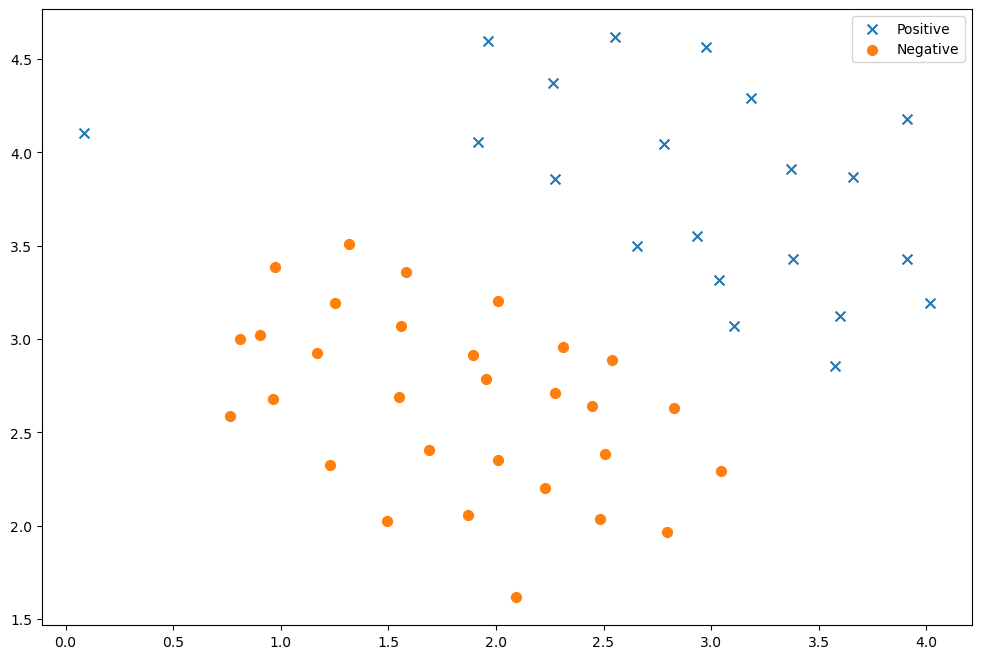

In [36]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

#We can see that there is a positive outlier in the plot

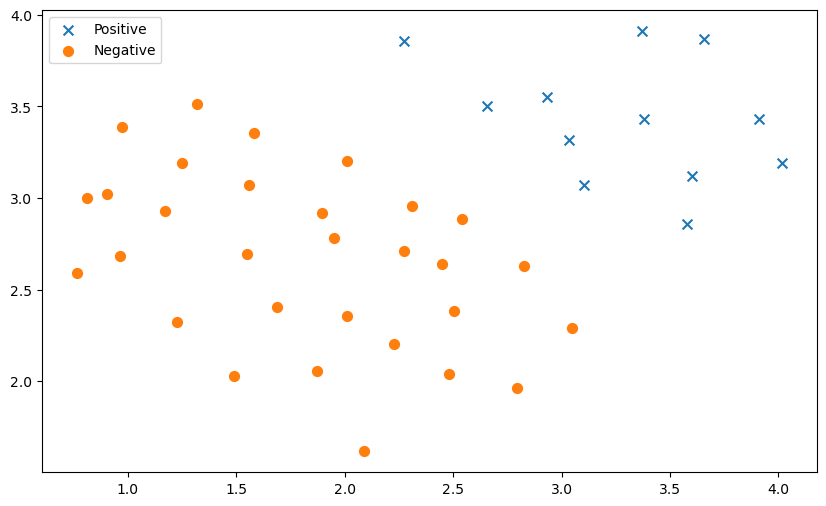

In [37]:
data= data[data['X2'] < 4]  #Let's eliminate the outlier
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

In [39]:
#We will use this function to separate the dataset:

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

### SVM: LINEAR KERNEL

The SVM with a linear kernel works by finding the line (or hyperplane) that best separates the two classes of data. The line is determined based on the similarity between the data points and the hyperplane, which is measured using the linear kernel.

In [42]:
# First we call the function created before and split our data

train_set, val_set, test_set = train_val_test_split(data, stratify=None)

In [43]:
X_train = train_set.drop(['y'], axis=1)
y_train = train_set['y'].copy()

X_val = val_set.drop('y', axis=1)
y_val = val_set['y'].copy()

X_test = test_set.drop('y', axis=1)
y_test = test_set['y'].copy()

In [45]:
from sklearn.svm import SVC

# SVM Large Margin Classification
svm_clf = SVC(kernel="linear", C=50)
svm_clf.fit(X_train, y_train)

SVC(C=50, kernel='linear')

In [46]:
#Let's predict!

y_pred = svm_clf.predict(X_val)

In [51]:
print("F1 Score:", f1_score(y_pred, y_val))

F1 Score: 1.0
